<a href="https://colab.research.google.com/github/moizarsalan/Artificial-Neural-Network/blob/main/Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Abdul Moiz Arsalan**

**Reg_no: B22F1086AI072**

**Lab Instructor: Mam Ammara Irfan**

**Course Instructor: Dr Arshad Iqbal**

# **Lab: 03**

* Select dataset of your own choice also provide reference link of datset.
* Apply preprocessing techniques on your dataset.
* Remove outliers in your dataset.
* Apply ANN model on you dataset and perform visualization.

Dataset is taken from this repository of Github: https://github.com/moizarsalan/Advanced_Python_Labs/blob/main/Dataset/housing.csv

# **Loading and reading the Dataset**

This Python code is used to load and display basic information about a dataset stored in a CSV file.

* import pandas as pd: This imports the pandas library, which is useful for working with data in tables (like spreadsheets).

* file_path = "/content/housing.csv": This sets the path to the dataset file named "housing.csv" stored on the system.

* data = pd.read_csv(file_path): This reads the data from the CSV file and stores it in the variable data.

* print(data.info()): This displays basic information about the dataset, such as the number of rows, columns, and the data types of each column.

* print(data.head()): This shows the first few rows of the dataset, so you can get an idea of what the data looks like.

In [2]:
import pandas as pd

# Load the data set
file_path = "/content/housing.csv"
data = pd.read_csv (file_path)

# Display the basic information
print (data.info ())

# Display the first few Rows
print (data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.8

# **Handling Missing values**

This Python code checks for and handles missing values in the dataset.

* print(data.isnull().sum()): This checks if there are any missing (null) values in the dataset. It shows the total count of missing values in each column.

* data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True): This fills any missing values in the "total_bedrooms" column with the mean (average) value of that column. The inplace=True argument means that the changes will be made directly to the original dataset without needing to create a new variable.

In [4]:
# checking for missing values
print (data.isnull ().sum ())

# Filling missing values
data ['total_bedrooms'].fillna (data ['total_bedrooms'].mean (), inplace = True)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


<ipython-input-4-439d7c2cc7b6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data ['total_bedrooms'].fillna (data ['total_bedrooms'].mean (), inplace = True)


# **Encoding Categorical Variables**

This Python code is used to encode categorical data into numerical values.

* from sklearn.preprocessing import LabelEncoder: This imports the LabelEncoder class from the sklearn library, which is used to convert categorical (text) data into numerical labels.

* label_encoder = LabelEncoder(): This creates an instance of the LabelEncoder class, which will be used for encoding the data.

* data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity']): This line encodes the values in the "ocean_proximity" column. The fit_transform method converts the text values into numbers. For example, if "ocean_proximity" has categories like "near" and "far," they might be converted to 0 and 1.

* print(data['ocean_proximity'].unique()): This displays the unique values in the "ocean_proximity" column after encoding. You can see the numerical values assigned to the original categories.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encoding  ocean_proxmity column
label_encoder = LabelEncoder ()
data ['ocean_proximity'] = label_encoder.fit_transform (data ['ocean_proximity'])

# verifying encoding
print (data ['ocean_proximity'].unique())

[3 0 1 4 2]


# **Feature Scaling**

This Python code is used to scale numerical data to a standard range.

* from sklearn.preprocessing import StandardScaler: This imports the StandardScaler class from the sklearn library, which is used to scale numerical data so that it has a mean of 0 and a standard deviation of 1.

* num_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']: This defines a list of column names that contain numerical data, which will be scaled.

* scaler = StandardScaler(): This creates an instance of the StandardScaler class, which will be used to scale the data.

* data[num_cols] = scaler.fit_transform(data[num_cols]): This line applies the scaling transformation to the selected numerical columns. The fit_transform method calculates the scaling parameters (mean and standard deviation) from the data and then scales each value in the columns.

In [6]:
from sklearn.preprocessing import StandardScaler

num_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
scaler = StandardScaler ()
data[num_cols] = scaler.fit_transform (data[num_cols])

# **Outlier Detection and Removal**

This Python code is used to remove outliers (extreme values) from the dataset.

* import numpy as np: This imports the NumPy library, which is used for working with numerical data in Python.

* def remove_outliers(df, columns):: This defines a function called remove_outliers that will remove outliers from the specified columns in the dataset (df stands for the dataset and columns is a list of column names).

* for col in columns:: This loop goes through each column listed in the columns list.

* Q1 = df[col].quantile(0.25) and Q3 = df[col].quantile(0.75): These lines calculate the first quartile (Q1) and the third quartile (Q3) for each column. Quartiles divide the data into four equal parts.

* IQR = Q3 - Q1: This calculates the interquartile range (IQR), which is the difference between Q3 and Q1. The IQR tells us how spread out the middle 50% of the data is.

* lower_bound = Q1 - 1.5 * IQR and upper_bound = Q3 + 1.5 * IQR: These lines calculate the lower and upper bounds to identify the acceptable range of values. Any value outside this range is considered an outlier.

* df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]: This line filters the data to keep only the values that are within the calculated bounds (i.e., it removes the outliers).

* return df: After removing outliers from all specified columns, the updated dataset is returned.

* data = remove_outliers(data, num_cols): This applies the remove_outliers function to the data dataset for the specified numerical columns (num_cols), removing any outliers.

In [7]:
import numpy as np

def remove_outliers (df, columns):
  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df [col] >= lower_bound) & (df [col] <= upper_bound)]
  return df

data = remove_outliers (data, num_cols)

# **Spliting data into training and testing sets**

This Python code splits the dataset into training and testing sets for machine learning purposes.

* from sklearn.model_selection import train_test_split: This imports the train_test_split function from sklearn.model_selection. This function is used to split a dataset into training and testing subsets.

* x = data.drop('median_house_value', axis=1): This line defines x as the features (input variables) of the dataset. It removes the median_house_value column from the dataset because this column is the target variable that we are trying to predict. The axis=1 argument means we're dropping a column, not a row.

* y = data['median_house_value']: This line defines y as the target variable, which is the median_house_value column from the dataset. This is the value we want to predict using the features in x.

* x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42): This splits the dataset into training and testing sets.

* x_train and y_train will be used to train the model.
x_test and y_test will be used to test the model and evaluate its performance.
test_size=0.2 means that 20% of the data will be used for testing, and the remaining 80% will be used for training.
random_state=42 ensures that the split is reproducible, meaning the same split will occur each time the code is run.

In [8]:
from sklearn.model_selection import train_test_split

# defining features x and y
x = data.drop ('median_house_value', axis = 1)
y = data ['median_house_value']

# splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# **Builing ANN**

This Python code creates a deep learning model using TensorFlow and Keras to predict the target variable, which is median_house_value from the dataset.

Here’s a breakdown of the code:

* import tensorflow as tf: This imports the TensorFlow library, which is used for building and training machine learning models.

* from tensorflow.keras.models import Sequential: This imports the Sequential class from Keras, which is used to build a neural network model layer by layer.

* from tensorflow.keras.layers import Dense, Dropout: This imports the Dense (fully connected) and Dropout layers from Keras.

* Dense layers are the core building blocks of neural networks, where each neuron is connected to every neuron in the previous layer.
Dropout is a regularization technique used to reduce overfitting by randomly dropping a certain percentage of neurons during training.
model = Sequential(): This initializes a Sequential model, which means the model will have layers stacked one after another.

* model.add(Dense(units=64, activation='relu', input_shape=(x_train.shape[1],))): This adds the first Dense layer with 64 neurons and uses the ReLU (Rectified Linear Unit) activation function.
input_shape=(x_train.shape[1],) specifies the shape of the input data (the number of features in x_train).
* model.add(Dense(units=32, activation='relu')): This adds another Dense layer with 32 neurons and ReLU activation.

* model.add(Dense(units=16, activation='relu')): This adds a third Dense layer with 16 neurons and ReLU activation.

* model.add(Dropout(0.3)): This adds a Dropout layer with a dropout rate of 30% (0.3), meaning 30% of the neurons will be randomly dropped during training to prevent overfitting.

* model.add(Dense(units=1)): This adds the final Dense layer with a single neuron to produce the output, which is the predicted median_house_value.

* model.compile(optimizer='adam', loss='mae', metrics=['mae']):

* optimizer='adam' specifies the Adam optimizer, which is commonly used for training deep learning models.
* loss='mae' uses Mean Absolute Error (MAE) as the loss function, which is appropriate for regression problems.
* metrics=['mae'] adds MAE as a metric to evaluate the performance of the model during training.

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

# adding layers

model.add(Dense(units=64, activation = 'relu', input_shape=(x_train.shape[1],)))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=16, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mae', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Training the model**


This Python code trains the deep learning model using the training data.

Here’s a breakdown of the code:

* history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1):
* model.fit(x_train, y_train): This starts the training of the model. It uses x_train as the input features and y_train as the target labels.
* epochs=100: This specifies that the model will go through the entire training dataset 100 times (100 epochs). Each epoch represents one full pass through the training data.
* batch_size=32: This sets the number of training samples processed before the model updates its weights. A batch size of 32 means the model will process 32 samples at a time.
* validation_split=0.2: This reserves 20% of the training data for validation, so the model can evaluate its performance on unseen data during training (useful for monitoring overfitting).
* verbose=1: This controls the output displayed during training. Setting verbose=1 will display the progress of the training for each epoch, including loss and metrics values.

In [16]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5064 - mae: 0.5064 - val_loss: 0.3417 - val_mae: 0.3417
Epoch 2/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3717 - mae: 0.3717 - val_loss: 0.3203 - val_mae: 0.3203
Epoch 3/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3517 - mae: 0.3517 - val_loss: 0.3133 - val_mae: 0.3133
Epoch 4/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3384 - mae: 0.3384 - val_loss: 0.3151 - val_mae: 0.3151
Epoch 5/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3380 - mae: 0.3380 - val_loss: 0.3148 - val_mae: 0.3148
Epoch 6/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3324 - mae: 0.3324 - val_loss: 0.3006 - val_mae: 0.3006
Epoch 7/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3333 - mae: 0.3333 - val_loss: 0.3020 - val_mae: 0.3020
Epoch 8/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3319 - mae: 0.3319 - val_loss: 0.2976 - val_mae: 0.2976
Epoch 9/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

# **Evaluating Model**

This Python code evaluates the performance of the trained model on the test dataset and prints the Mean Absolute Error (MAE).

Here’s a breakdown of the code:

* loss, mae = model.evaluate(x_test, y_test):
model.evaluate(x_test, y_test): This evaluates the performance of the trained model on the test data (x_test for the input features and y_test for the actual target values).
* The evaluate function returns two values:

loss: The value of the loss function (Mean Absolute Error in this case) on the test data.

mae: The calculated Mean Absolute Error (MAE) metric for the model's predictions on the test set.
print(f'Mean Absolute Error on Test Set: {mae}'):

* This line prints the MAE value on the test dataset, showing how accurately the model predicted the median_house_value on unseen data. A lower MAE value indicates better accuracy.

In [17]:
loss, mae = model.evaluate(x_test, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2760 - mae: 0.2760
Mean Absolute Error on Test Set: 0.2737736403942108


# **Visualizing Training Results**

This code plots the loss values over each epoch for both training and validation data.

* plt.plot(history.history['loss'], label='Training loss'): Plots the training loss values stored in the history object.
* plt.plot(history.history['val_loss'], label='Validation loss'): Plots the validation loss values from the history object.
* plt.xlabel('Epochs') and plt.ylabel('Loss'): Labels the x-axis as "Epochs" and the y-axis as "Loss".
* plt.legend(): Displays the legend to distinguish between training and validation loss.
* plt.title('Training and Validation Loss'): Adds a title to the plot.
* plt.show(): Displays the plot.

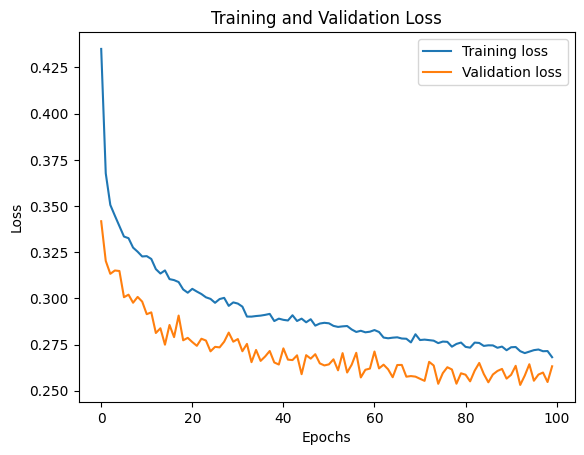

In [18]:
import matplotlib.pyplot as plt

# Plot loss values

plt.plot(history.history['loss'], label ='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()